# Report Plots
Create training curve and sample plots for reports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import load_losses, load_samples, load_dataset, compute_mean_log_likelihood

## Load Data

In [2]:
models = ['ebm', 'dsm', 'vae', 'gan']
datasets = ['checkerboard', 'gaussian_mixture', 'pinwheel', 'spiral']

# Load losses and model samples
losses = []
samples = np.empty((4, 4, 2000, 2))
for i, model in enumerate(models):
    losses.append([])
    for j, dataset in enumerate(datasets):
        losses[i].append(load_losses(model, dataset))
        samples[i][j] = load_samples(model, dataset)

In [3]:
# Load training and test datasets
X_train = np.empty((4, 2000, 2))
X_test = np.empty((4, 500, 2))
for i, dataset in enumerate(datasets):
    X_train[i], X_test[i] = load_dataset(dataset)

## Losses

In [4]:
models = ['ebm', 'dsm', 'vae', 'gan']
datasets = ['checkerboard', 'gaussian_mixture', 'pinwheel', 'spiral']
dataset_names = ['Checkerboard', 'Gaussian Mix', 'Pinwheel', 'Spiral']
loss_names = ['Energy Function', 'DSM Loss', 'ELBO Loss', 'Loss']
linewidths = [1, 1, 1, 0.5]

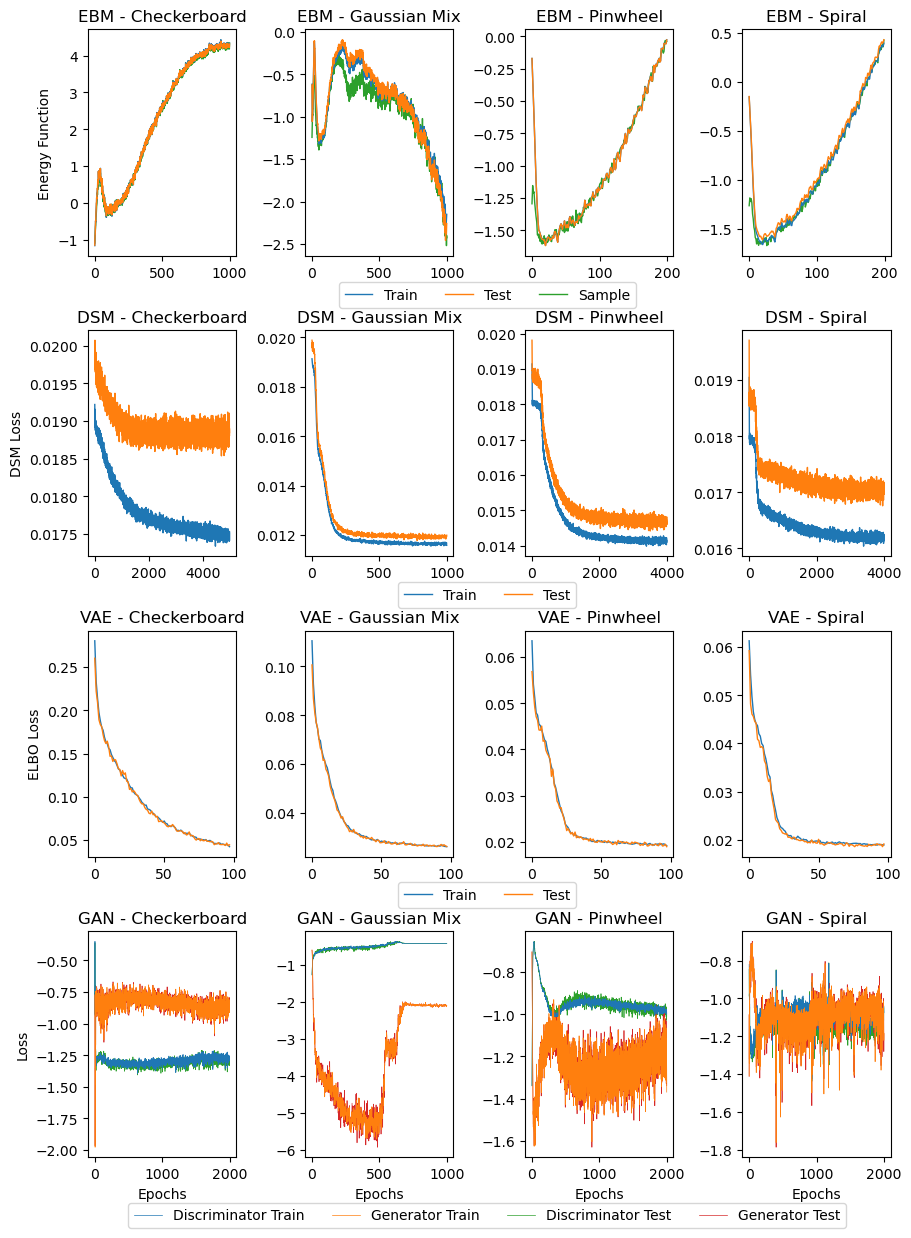

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 12), constrained_layout=True)
fig.set_constrained_layout_pads(hspace=0.1)
for i, model in enumerate(models):
    for j, dataset in enumerate(datasets):
        ax = axes[i][j]

        # Assume `losses` is a list of lists of dicts, indexed [model][dataset]
        loss = losses[i][j]

        if i == 2:
            train_losses = loss['train'][2:]
            test_losses = loss['test'][2:]
        elif i != 3:
            train_losses = loss['train']
            test_losses = loss['test']

        # Plotting train and test losses
        if i != 3:
            ax.plot(train_losses, label='Train' if j == 0 else "", linewidth=linewidths[i])
            ax.plot(test_losses, label='Test' if j == 0 else "", linewidth=linewidths[i])

        if i == 0:
            ax.plot(loss['sample'], label='Sample' if j == 0 else "", zorder=1, linewidth=linewidths[i])
        elif i == 3:
            ax.plot(loss['d_train'], label='Discriminator Train' if j == 0 else "", linewidth=linewidths[i])
            ax.plot(loss['g_train'], label='Generator Train' if j == 0 else "", linewidth=linewidths[i])
            ax.plot(loss['d_test'], label='Discriminator Test' if j == 0 else "", zorder=1, linewidth=linewidths[i])
            ax.plot(loss['g_test'], label='Generator Test' if j == 0 else "", zorder=1, linewidth=linewidths[i])
        
        # Setting x-axis labels only for the bottom row plots
        if i == len(models) - 1:
            ax.set_xlabel('Epochs')
        
        # Setting y-axis labels only for the first column
        if j == 0:
            ax.set_ylabel(loss_names[i])

        ax.set_title(f'{model.upper()} - {dataset_names[j]}')

# Adding individual legends between rows
y_offsets = [0.742, 0.492, 0.242, -0.025]
for i in range(4):
    handles, labels = axes[i, 0].get_legend_handles_labels()
    y_offset = y_offsets[i]  # Adjust the vertical offset for each row's legend
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.535, y_offset), ncol=len(labels))

plt.show()

## Samples

In [6]:
def subplot_data(ax, X_train, samples):
    ax.scatter(samples[:, 0], samples[:, 1], marker='.', label='Model', s=5)
    ax.scatter(X_train[:, 0], X_train[:, 1], alpha=0.2, marker='o', label='True', s=5)
    ax.axis('equal')

In [7]:
def plot_data(dataset_num1, dataset_num2):
    fig, axs = plt.subplots(4, 2, figsize=(8, 12))

    for i, ax in enumerate(axs.flat):
        dataset_num = dataset_num1 if i < 4 else dataset_num2
        subplot_data(ax, X_train[dataset_num], samples[i % 4][dataset_num])
        ax.set_title(f'{models[i % 4].upper()} - {dataset_names[dataset_num]}')
        if i >= 6:
            ax.set_xlabel("$x_1$")
        if i % 2 == 0:
            ax.set_ylabel("$x_2$")

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=2)

    plt.tight_layout(h_pad=0.01)  # Adjust subplots to fit in the figure area.
    plt.show()

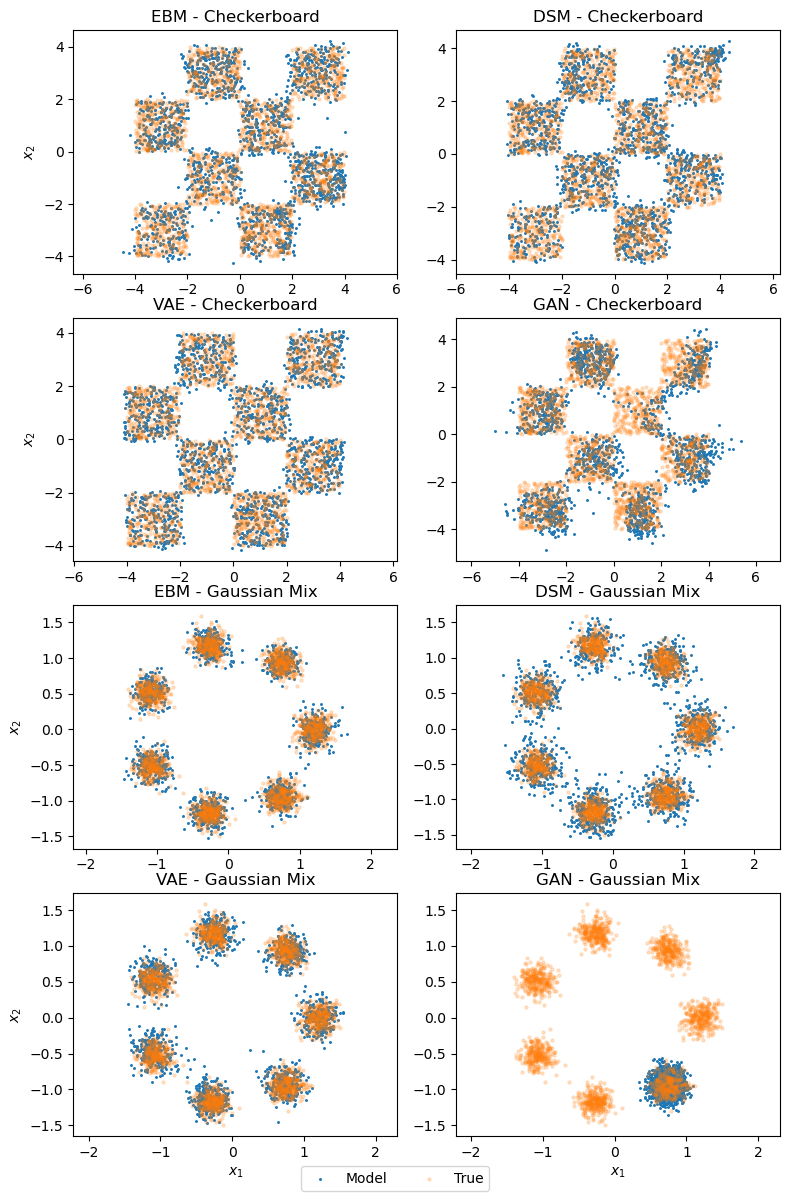

In [8]:
plot_data(0, 1)

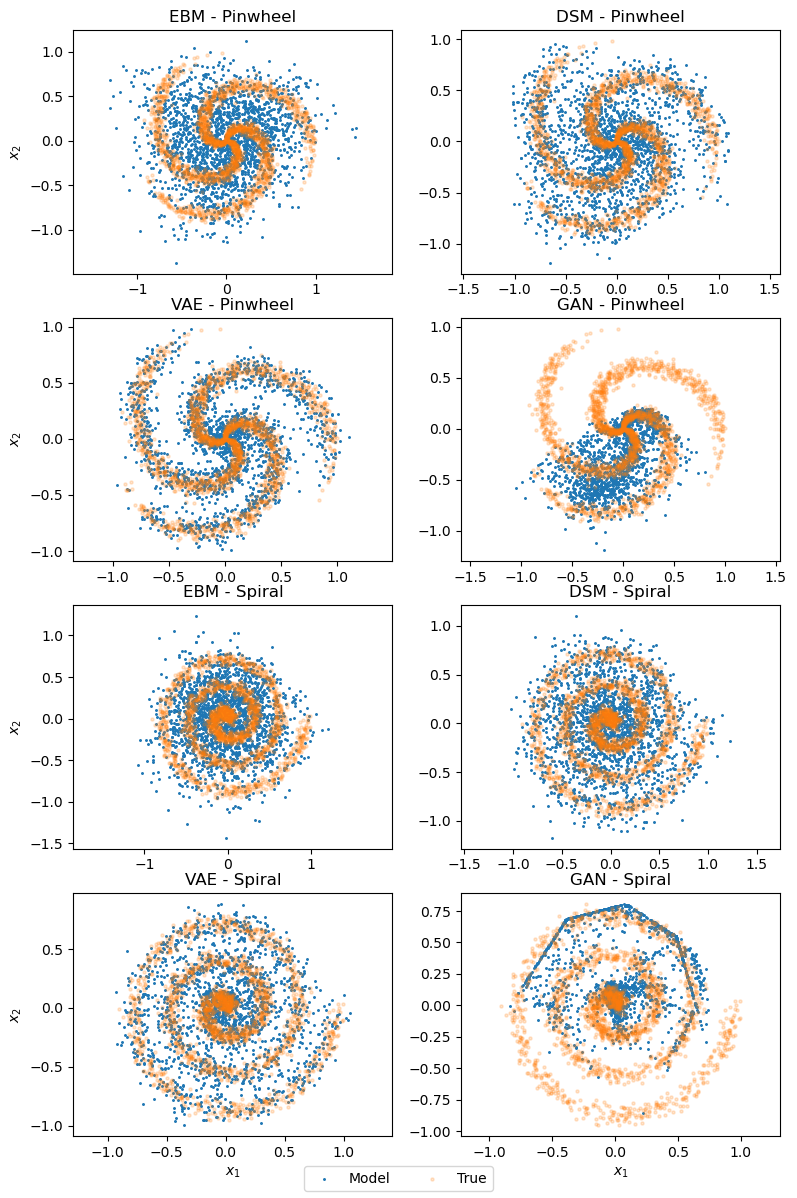

In [9]:
plot_data(2,3)

## Quantitative Analysis

In [10]:
print('Mean log likelihoods:')
for j, dataset in enumerate(datasets):
    for i, model in enumerate(models):
        log_likelihood = compute_mean_log_likelihood(samples[i][j], X_test[i][j])
        print(f'{model.upper()} - {dataset_names[j]}:', log_likelihood)

Mean log likelihoods:
EBM - Checkerboard: -3.9586493960641933
DSM - Checkerboard: -4.624172089712637
VAE - Checkerboard: -4.1451705599782604
GAN - Checkerboard: -5.375529689816331
EBM - Gaussian Mix: -54.21946153130514
DSM - Gaussian Mix: -1.34391219405919
VAE - Gaussian Mix: -7.8567495007881485
GAN - Gaussian Mix: -291.28479284440215
EBM - Pinwheel: -269.1584507992238
DSM - Pinwheel: -3.115764020200447
VAE - Pinwheel: 0.43892131380381066
GAN - Pinwheel: -10.27649885940689
EBM - Spiral: -109.84183995863016
DSM - Spiral: -4.410620496426235
VAE - Spiral: 0.5177414991079438
GAN - Spiral: -2.5325449397882784
